In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy.stats as stats

In [3]:
%config InlineBackend.figure_format = 'retina'
az.style.use('arviz-darkgrid')

# chapter code

In [4]:
def posterior_grid_approx(grid_points=5, success=6, tosses=9):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)
    print(p_grid)

    # define prior
    prior = np.repeat(1, grid_points)  # uniform
    #prior = (p_grid >= 0.5).astype(int)  # truncated
    #prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

In [6]:
points = 100
w, n = 2, 9
p_grid, posterior = posterior_grid_approx(points, w, n)

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

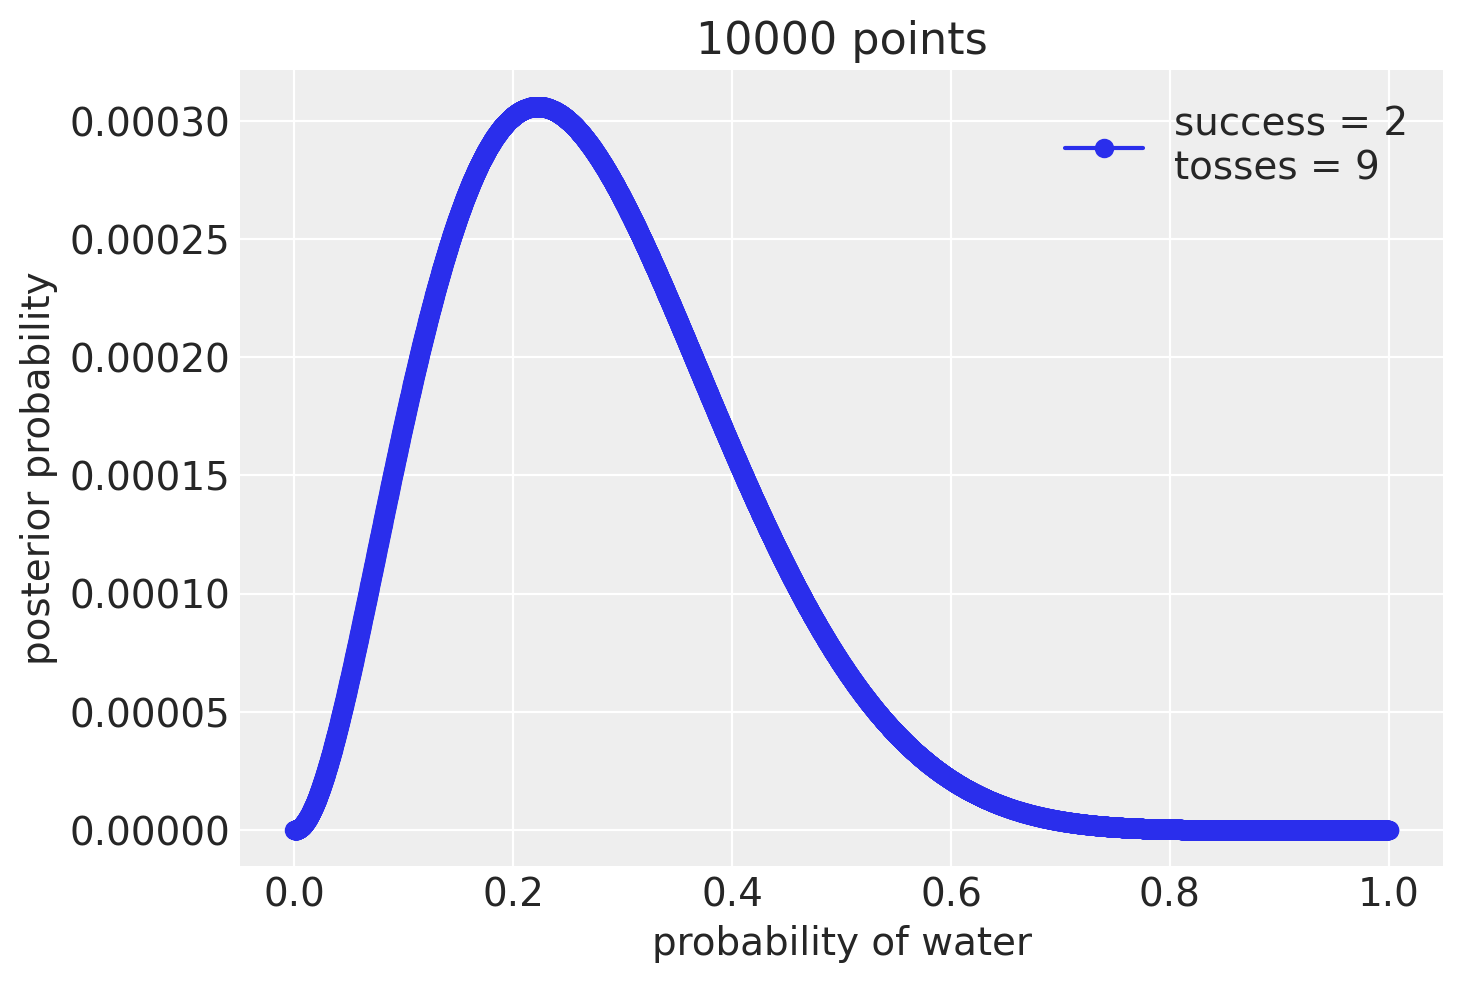

In [6]:
plt.plot(p_grid, posterior, 'o-', label=f'success = {w}\ntosses = {n}')
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title(f'{points} points')
plt.legend(loc=0);

In [7]:
data = np.repeat((0, 1), (3, 6))
data

array([0, 0, 0, 1, 1, 1, 1, 1, 1])

In [8]:
with pm.Model() as normal_aproximation:
    p = pm.Uniform('p', 0, 1)
    w = pm.Binomial('w', n=len(data), p=p, observed=data.sum())
    mean_q = pm.find_MAP()
    std_q = ((1/pm.find_hessian(mean_q, vars=[p]))**0.5)[0]

In [9]:
mean_q['p'], std_q

(array(0.66666667), array([0.15713484]))

In [21]:
# analytical calculation
w, n = 6, 9
x = np.linspace(0, 1, 100)

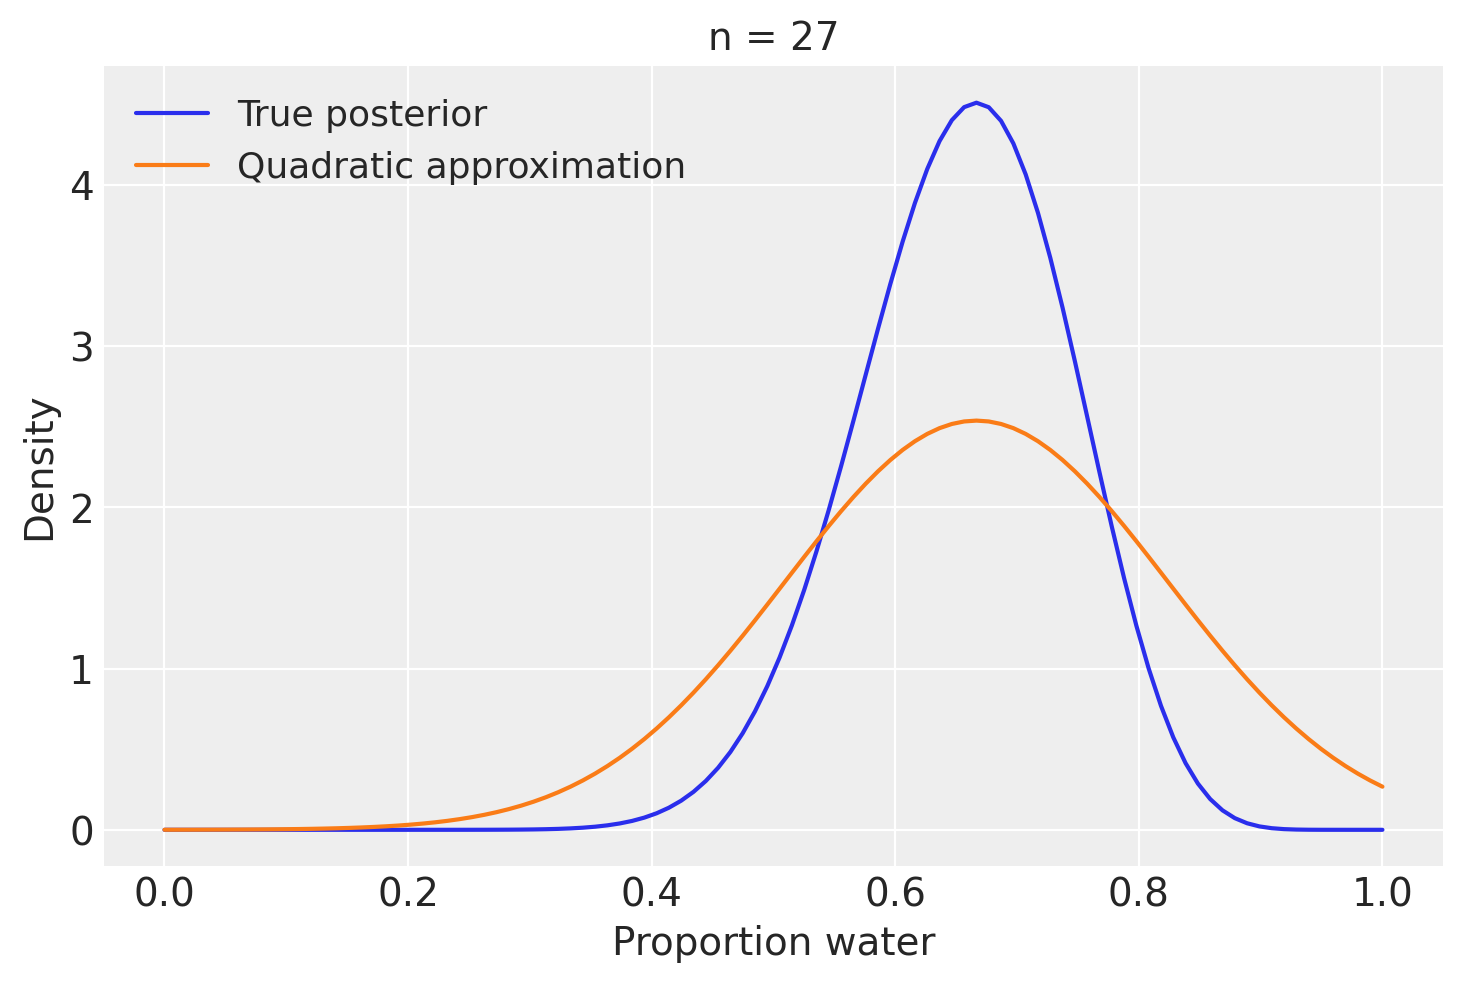

In [22]:
plt.plot(x, stats.beta.pdf(x , w+1, n-w+1),
         label='True posterior')

# quadratic approximation
plt.plot(x, stats.norm.pdf(x, mean_q['p'], std_q),
         label='Quadratic approximation')
plt.legend(loc=0, fontsize=13)

plt.title(f'n = {n}', fontsize=14)
plt.xlabel('Proportion water', fontsize=14)
plt.ylabel('Density', fontsize=14);

# practice problems

## 2M1

In [23]:
def uniform_prior(grid_points=5, success=6, tosses=9):
    """
    """
    p_grid = np.linspace(0, 1, grid_points)
    prior = np.repeat(1, grid_points)  

    likelihood = stats.binom.pmf(success, tosses, p_grid)

    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / unstd_posterior.sum()
    
    return p_grid, posterior

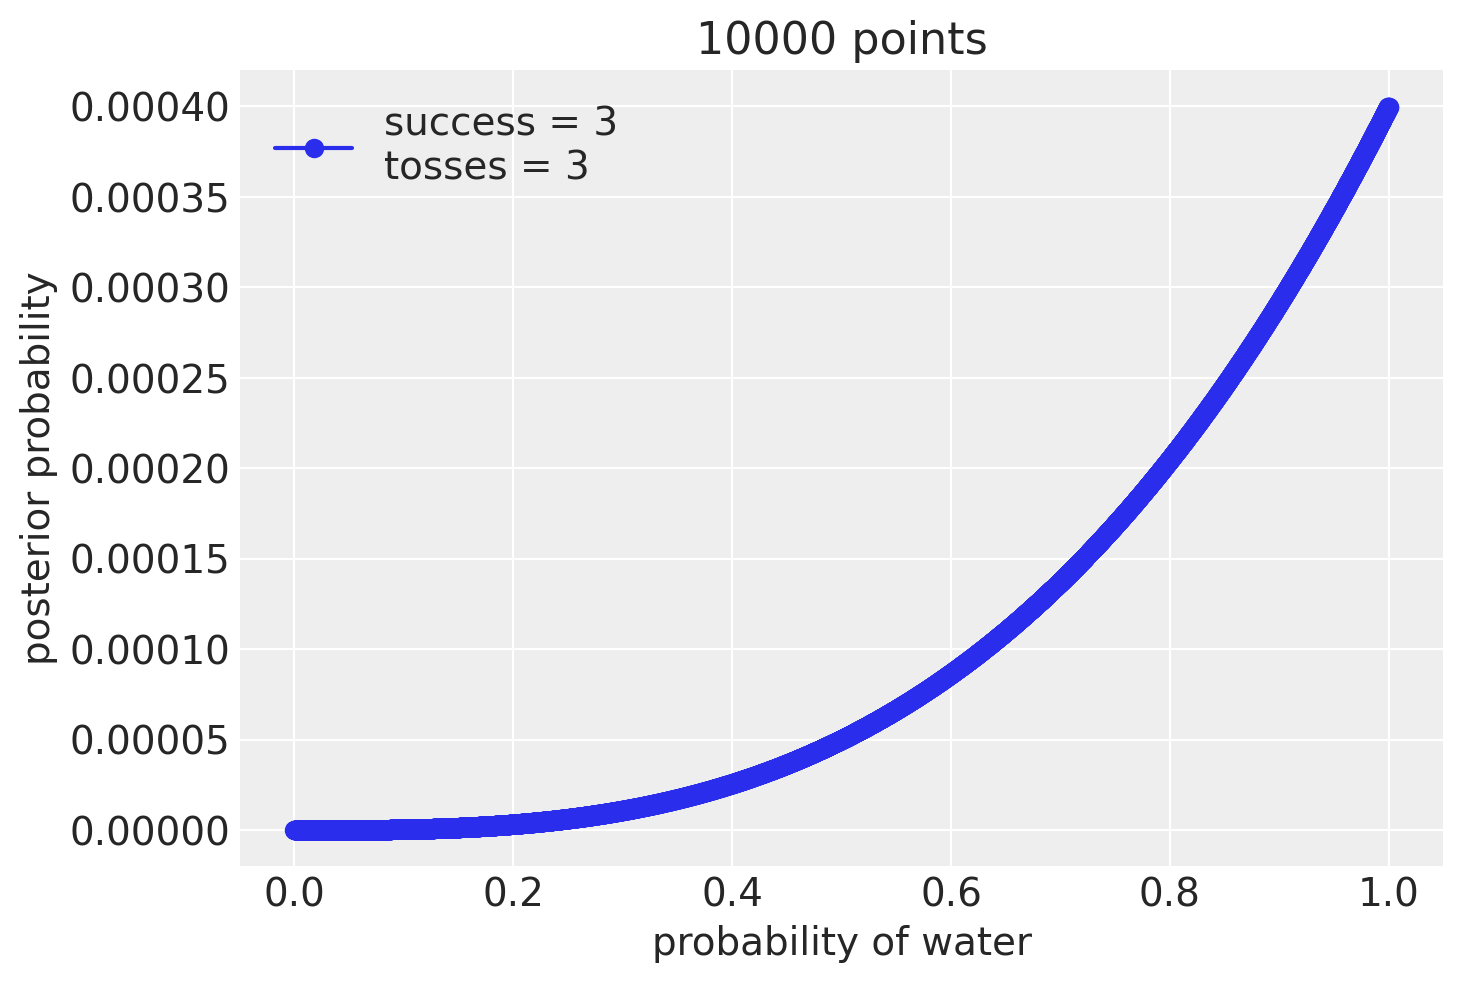

In [25]:
points = 10000
w, n = 3, 3
p_grid, posterior = uniform_prior(points, w, n)

plt.plot(p_grid, posterior, 'o-', label=f'success = {w}\ntosses = {n}')
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title(f'{points} points')
plt.legend(loc=0);

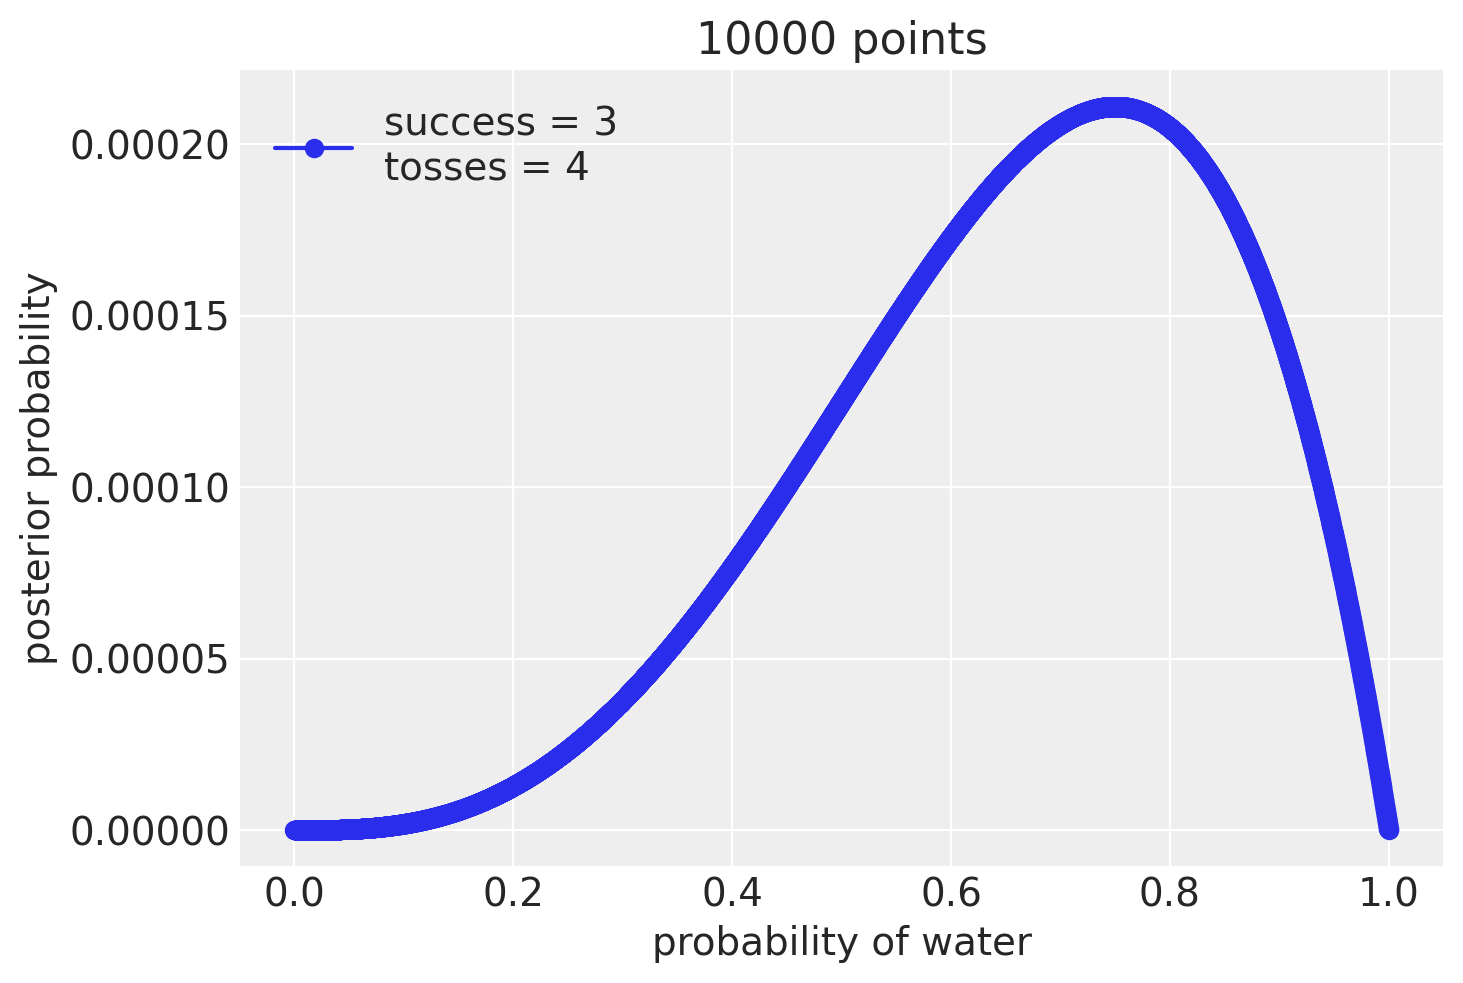

In [26]:
points = 10000
w, n = 3, 4
p_grid, posterior = uniform_prior(points, w, n)

plt.plot(p_grid, posterior, 'o-', label=f'success = {w}\ntosses = {n}')
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title(f'{points} points')
plt.legend(loc=0);

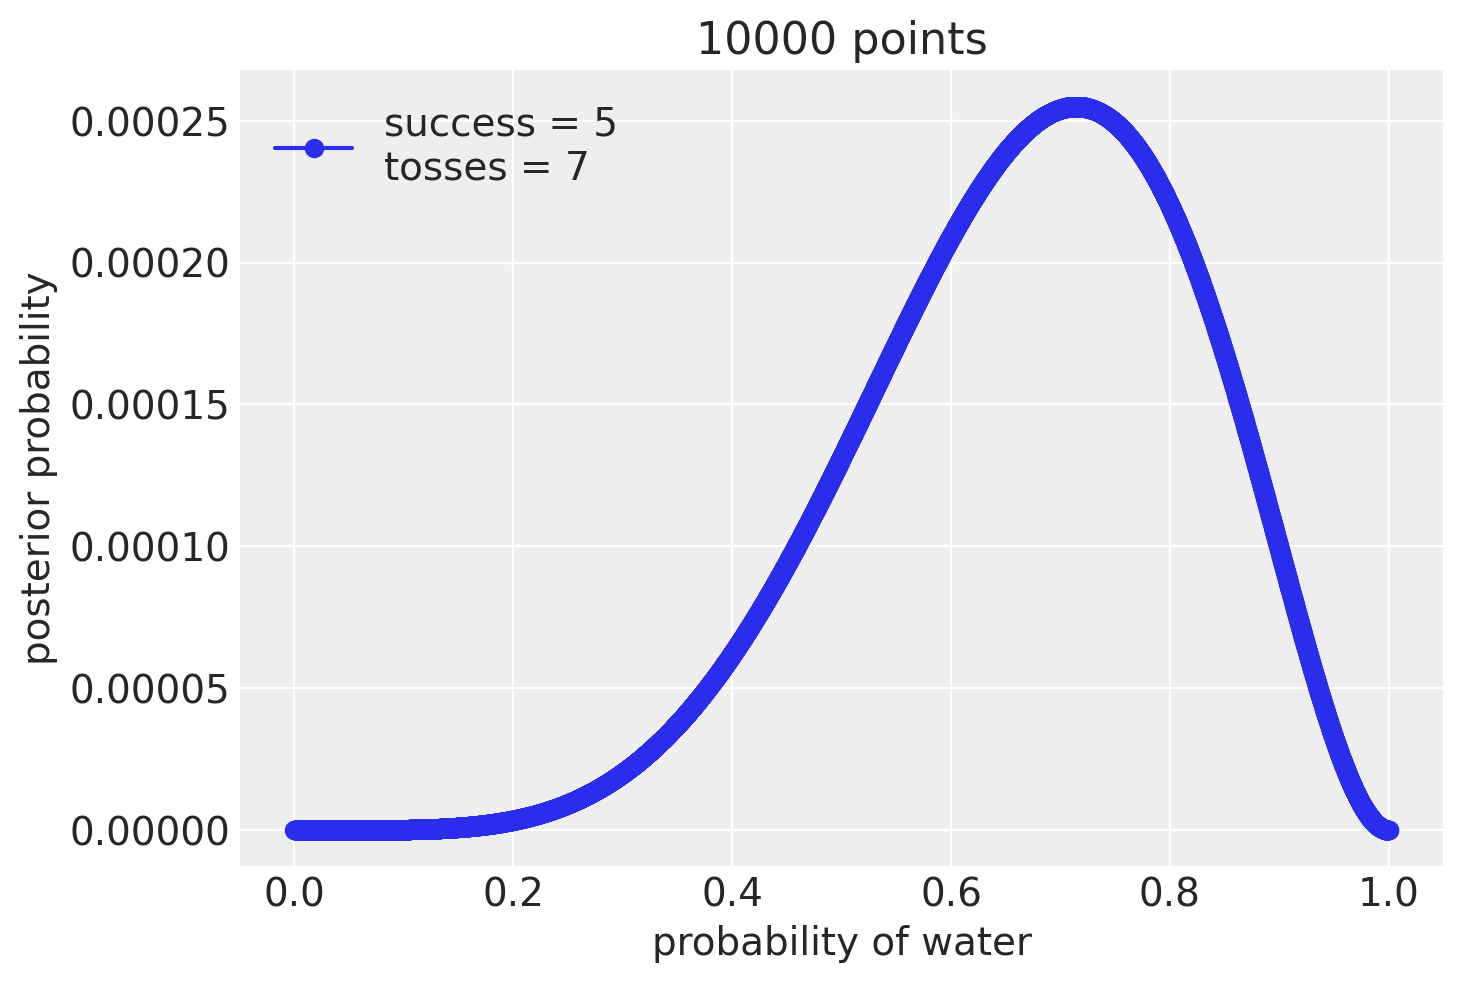

In [27]:
points = 10000
w, n = 5, 7
p_grid, posterior = uniform_prior(points, w, n)

plt.plot(p_grid, posterior, 'o-', label=f'success = {w}\ntosses = {n}')
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title(f'{points} points')
plt.legend(loc=0);

## 2M2

In [31]:
def binary_prior(grid_points=5, success=6, tosses=9):
    """
    """
    p_grid = np.linspace(0, 1, grid_points)

    transform = p_grid >= 0.5
    prior = np.where(transform, 1, 0)

    likelihood = stats.binom.pmf(success, tosses, p_grid)
    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / unstd_posterior.sum()
    
    return p_grid, posterior

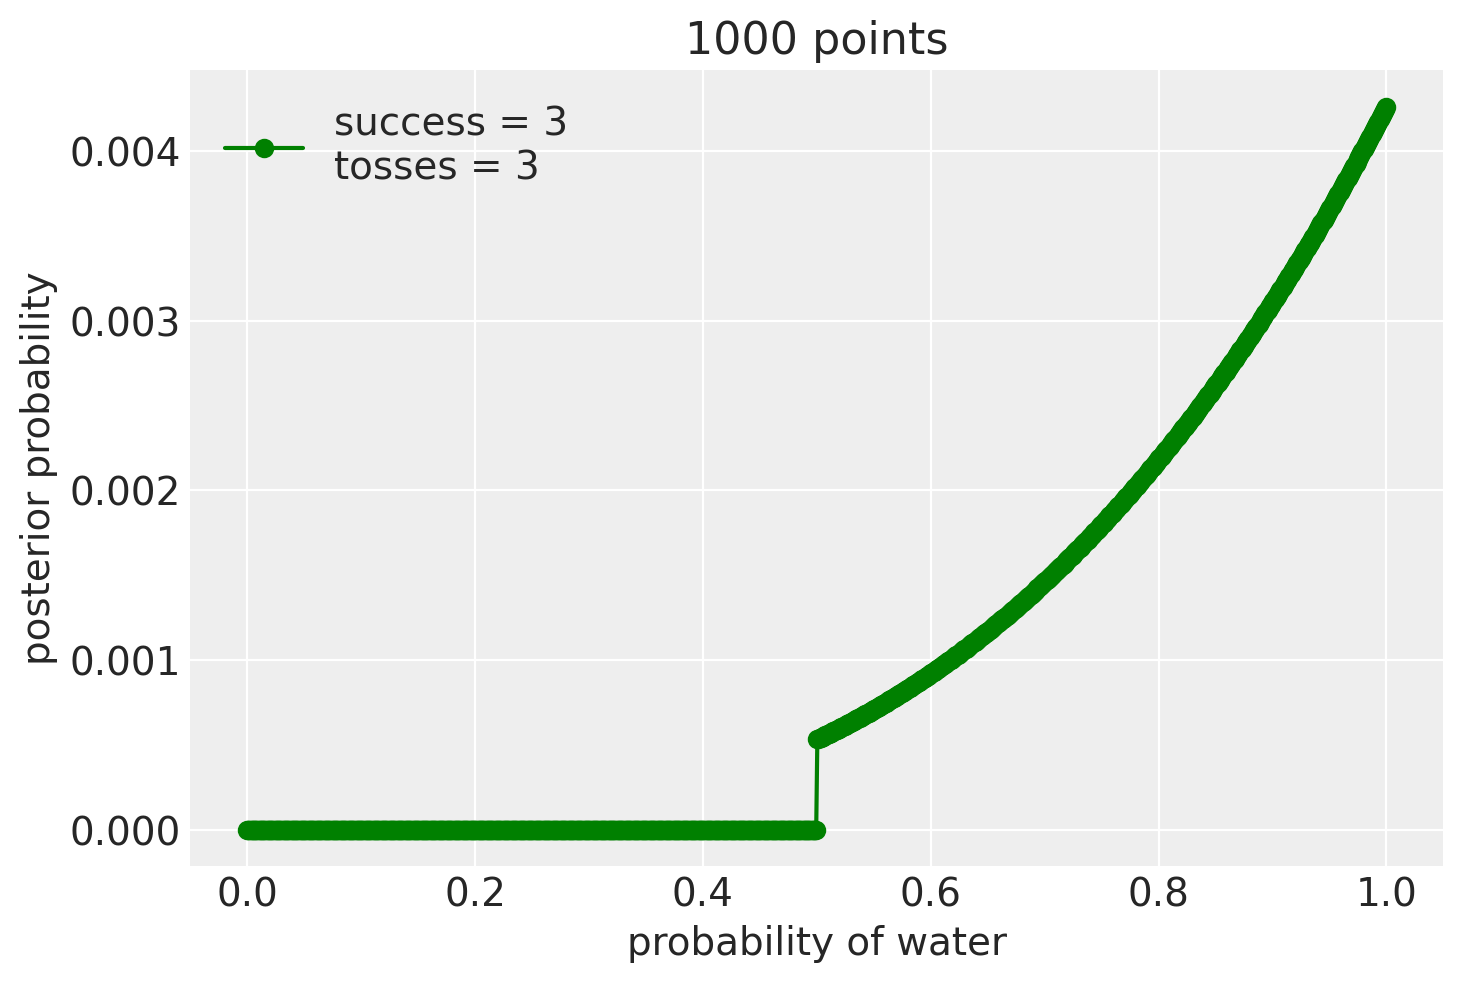

In [33]:
points = 1000
w, n = 3, 3
p_grid, posterior = binary_prior(points, w, n)

plt.plot(p_grid, posterior, 'o-', label=f'success = {w}\ntosses = {n}', color="green")
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title(f'{points} points')
plt.legend(loc=0);

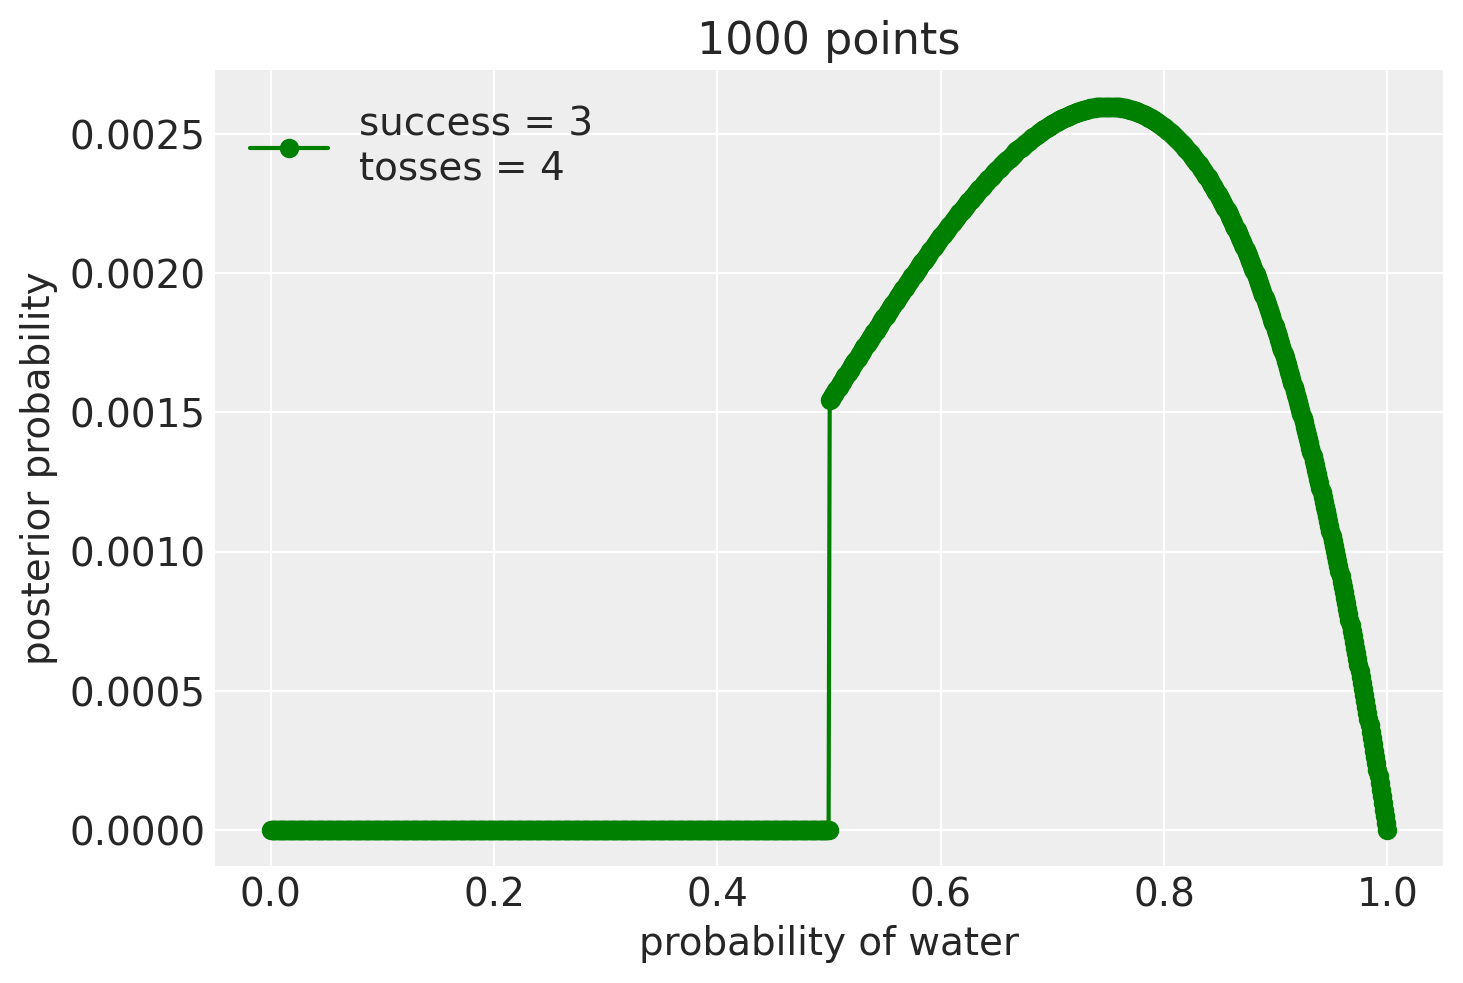

In [34]:
points = 1000
w, n = 3, 4
p_grid, posterior = binary_prior(points, w, n)

plt.plot(p_grid, posterior, 'o-', label=f'success = {w}\ntosses = {n}', color="green")
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title(f'{points} points')
plt.legend(loc=0);

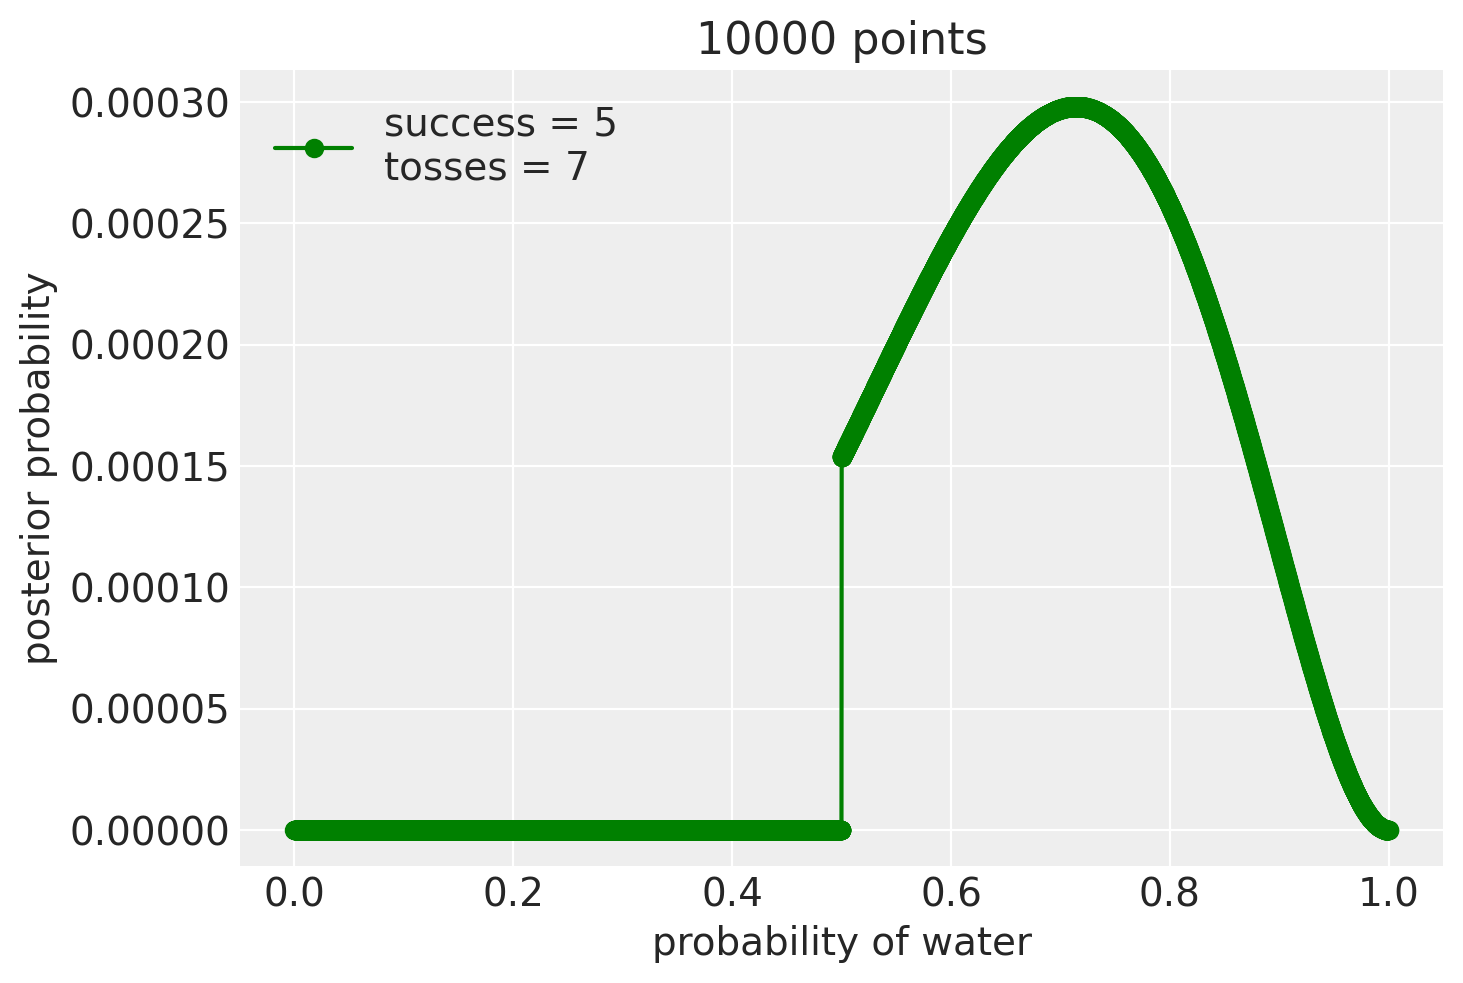

In [36]:
points = 10000
w, n = 5, 7
p_grid, posterior = binary_prior(points, w, n)

plt.plot(p_grid, posterior, 'o-', label=f'success = {w}\ntosses = {n}', color="green")
plt.xlabel('probability of water', fontsize=14)
plt.ylabel('posterior probability', fontsize=14)
plt.title(f'{points} points')
plt.legend(loc=0);

## 2M3

In [42]:
(0.3*0.5)/((0.5)+(0.5*0.3))

0.23076923076923075

## 2H

In [46]:
((0.5*(0.2**2)) + (0.5*(0.1**2)))

0.025000000000000005

In [48]:
(0.2*0.5)/(0.15)

0.6666666666666667

In [49]:
(0.9*0.333)/((0.3333*0.9)+(0.66667*0.8))

0.35965179657892776